<a href="https://colab.research.google.com/github/Taj1920/Data_Analysis/blob/main/Blinkit_Sales/Blinkit_sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

blinkit logo.avif

# **Blinkit Sales Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('blinkit.xlsx')
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Handling Nan values in Item Weight column**

In [4]:
df['Item Weight']=df['Item Weight'].fillna(df['Item Weight'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Cleaning Item Fat Content column

In [5]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [6]:
# converting LF, Low fat to Low Fat and reg to Regular
df['Item Fat Content']=df['Item Fat Content'].str.replace('reg','Regular')
df['Item Fat Content']=df['Item Fat Content'].str.replace('low fat','Low Fat')
df['Item Fat Content']=df['Item Fat Content'].str.replace('LF','Low Fat')
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

***Visualizing Total Sales***

In [7]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [8]:
df['Sales'].sum()

1201681.4928

# **Total Sales:    12,01,681.4928 Rs.**

In [9]:
#colors for plots
green='#00C853'
yellow='#FFEB3B'

#data label
def data_label(a):
  for i in a.containers:
    a.bar_label(i)

<ipython-input-10-b76dc41f9fad>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(a.index,rotation=90)


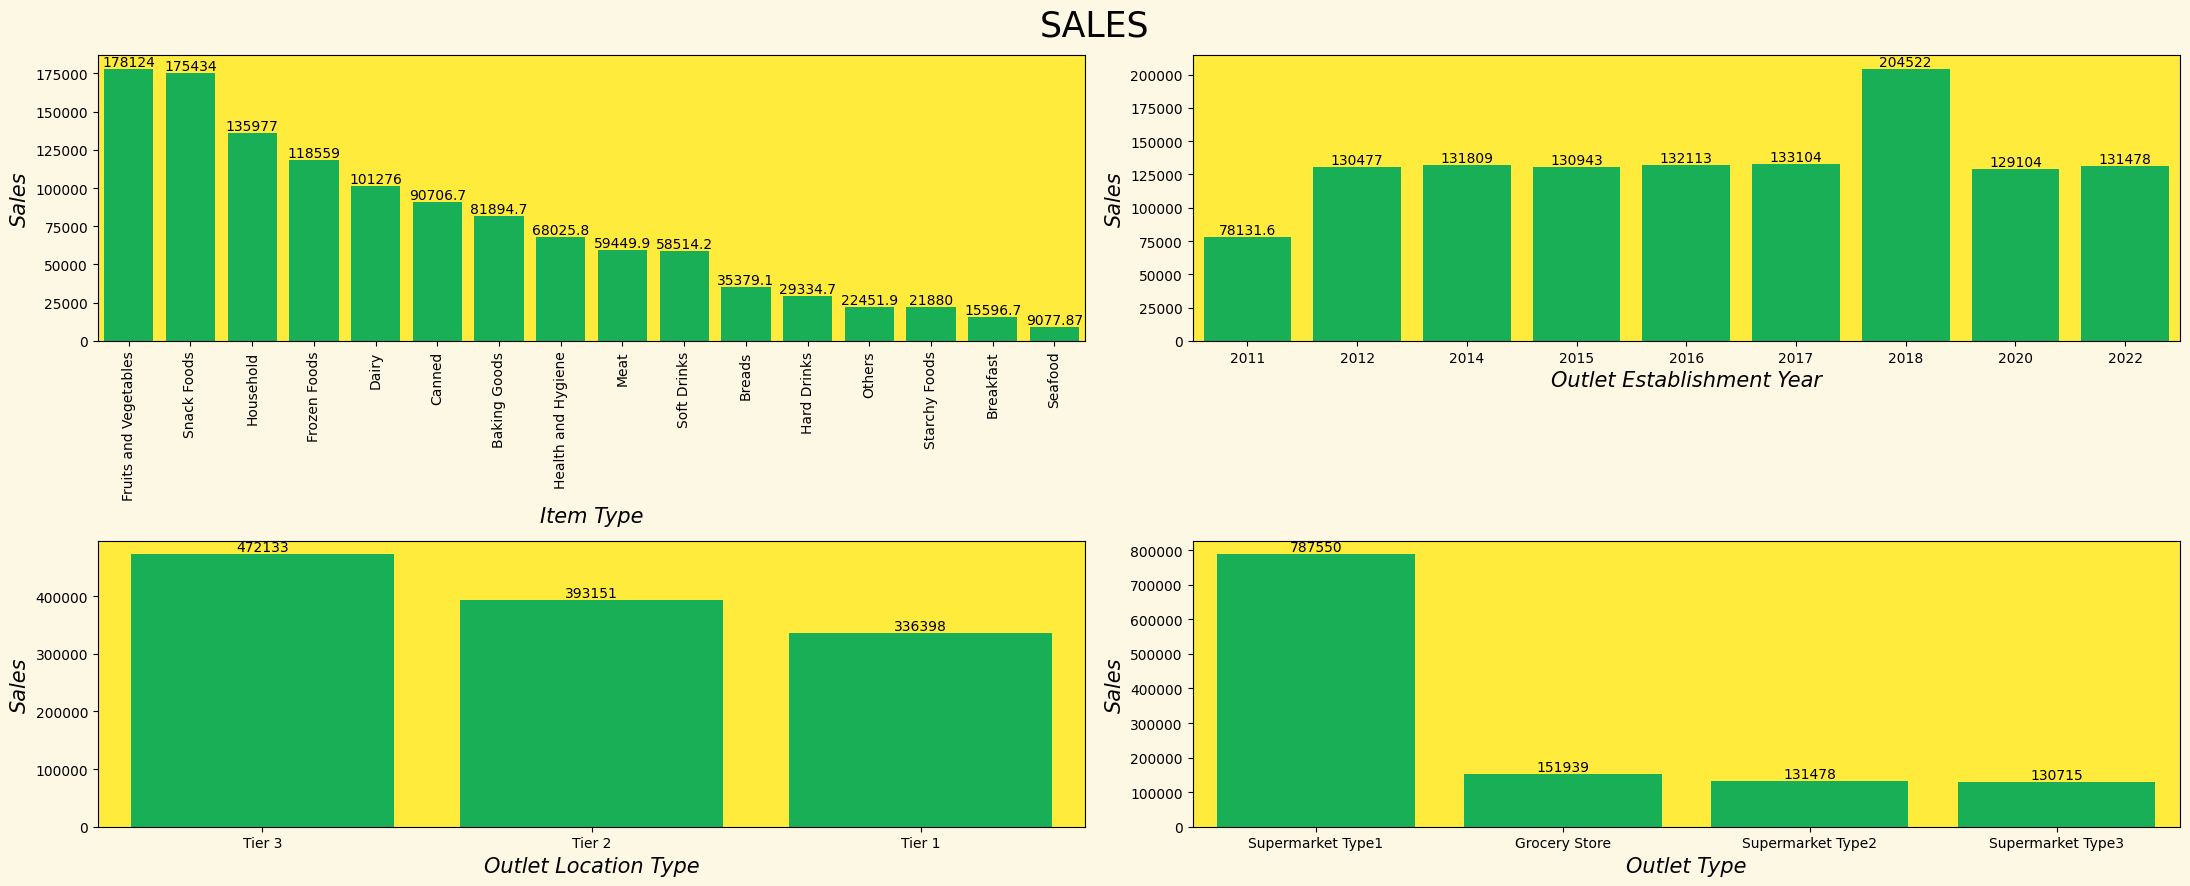

In [10]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(22,9))
fig.suptitle('SALES',fontsize=25)
fig.set_facecolor('#fdf8e3')
#Total sales by Item Type
#subplot 0,0
a=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
a=pd.DataFrame(a)
b=sns.barplot(x='Item Type',y='Sales',data=a,color=green,ax=axes[0,0])
axes[0,0].set_xlabel('Item Type',fontsize=15,fontstyle='italic')
axes[0,0].set_ylabel('Sales',fontsize=15,fontstyle='italic')
data_label(b)
axes[0,0].set_facecolor(yellow)
axes[0,0].set_xticklabels(a.index,rotation=90)


#Total sales by Outlet Establishment Year
#subplot 0,1
a=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_values(ascending=False)
a=pd.DataFrame(a)
b=sns.barplot(x='Outlet Establishment Year',y='Sales',data=a,color=green,ax=axes[0,1])
axes[0,1].set_xlabel('Outlet Establishment Year',fontsize=15,fontstyle='italic')
axes[0,1].set_ylabel('Sales',fontsize=15,fontstyle='italic')
data_label(b)
axes[0,1].set_facecolor(yellow)


#Total sales by Outlet Location Type
#subplot 0,1
a=df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False)
a=pd.DataFrame(a)
b=sns.barplot(x='Outlet Location Type',y='Sales',data=a,color=green,ax=axes[1,0])
axes[1,0].set_xlabel('Outlet Location Type',fontsize=15,fontstyle='italic')
axes[1,0].set_ylabel('Sales',fontsize=15,fontstyle='italic')
data_label(b)
axes[1,0].set_facecolor(yellow)


#Total sales by Outlet Type
#subplot 0,1
a=df.groupby('Outlet Type')['Sales'].sum().sort_values(ascending=False)
a=pd.DataFrame(a)
b=sns.barplot(x='Outlet Type',y='Sales',data=a,color=green,ax=axes[1,1])
axes[1,1].set_xlabel('Outlet Type',fontsize=15,fontstyle='italic')
axes[1,1].set_ylabel('Sales',fontsize=15,fontstyle='italic')
data_label(b)
axes[1,1].set_facecolor(yellow)

plt.tight_layout()

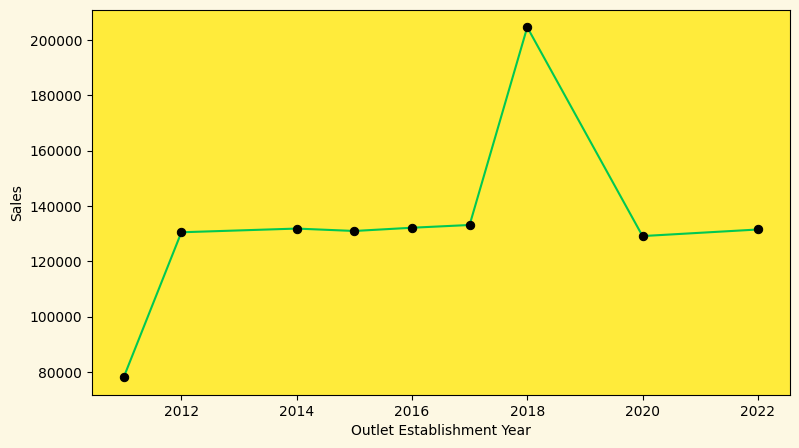

In [11]:
#Total Sales by outlet establishment year
a=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_values(ascending=False)
a=pd.DataFrame(a)
plt.figure(figsize=(9,5),facecolor='#fdf8e3')
b=sns.lineplot(x='Outlet Establishment Year',y='Sales',data=a,marker='o',markerfacecolor='black',markeredgecolor='black',color=green)
b.set_facecolor(yellow)

<ipython-input-12-015f3d72e109>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0][0].set_xticklabels(a.index,rotation=90)


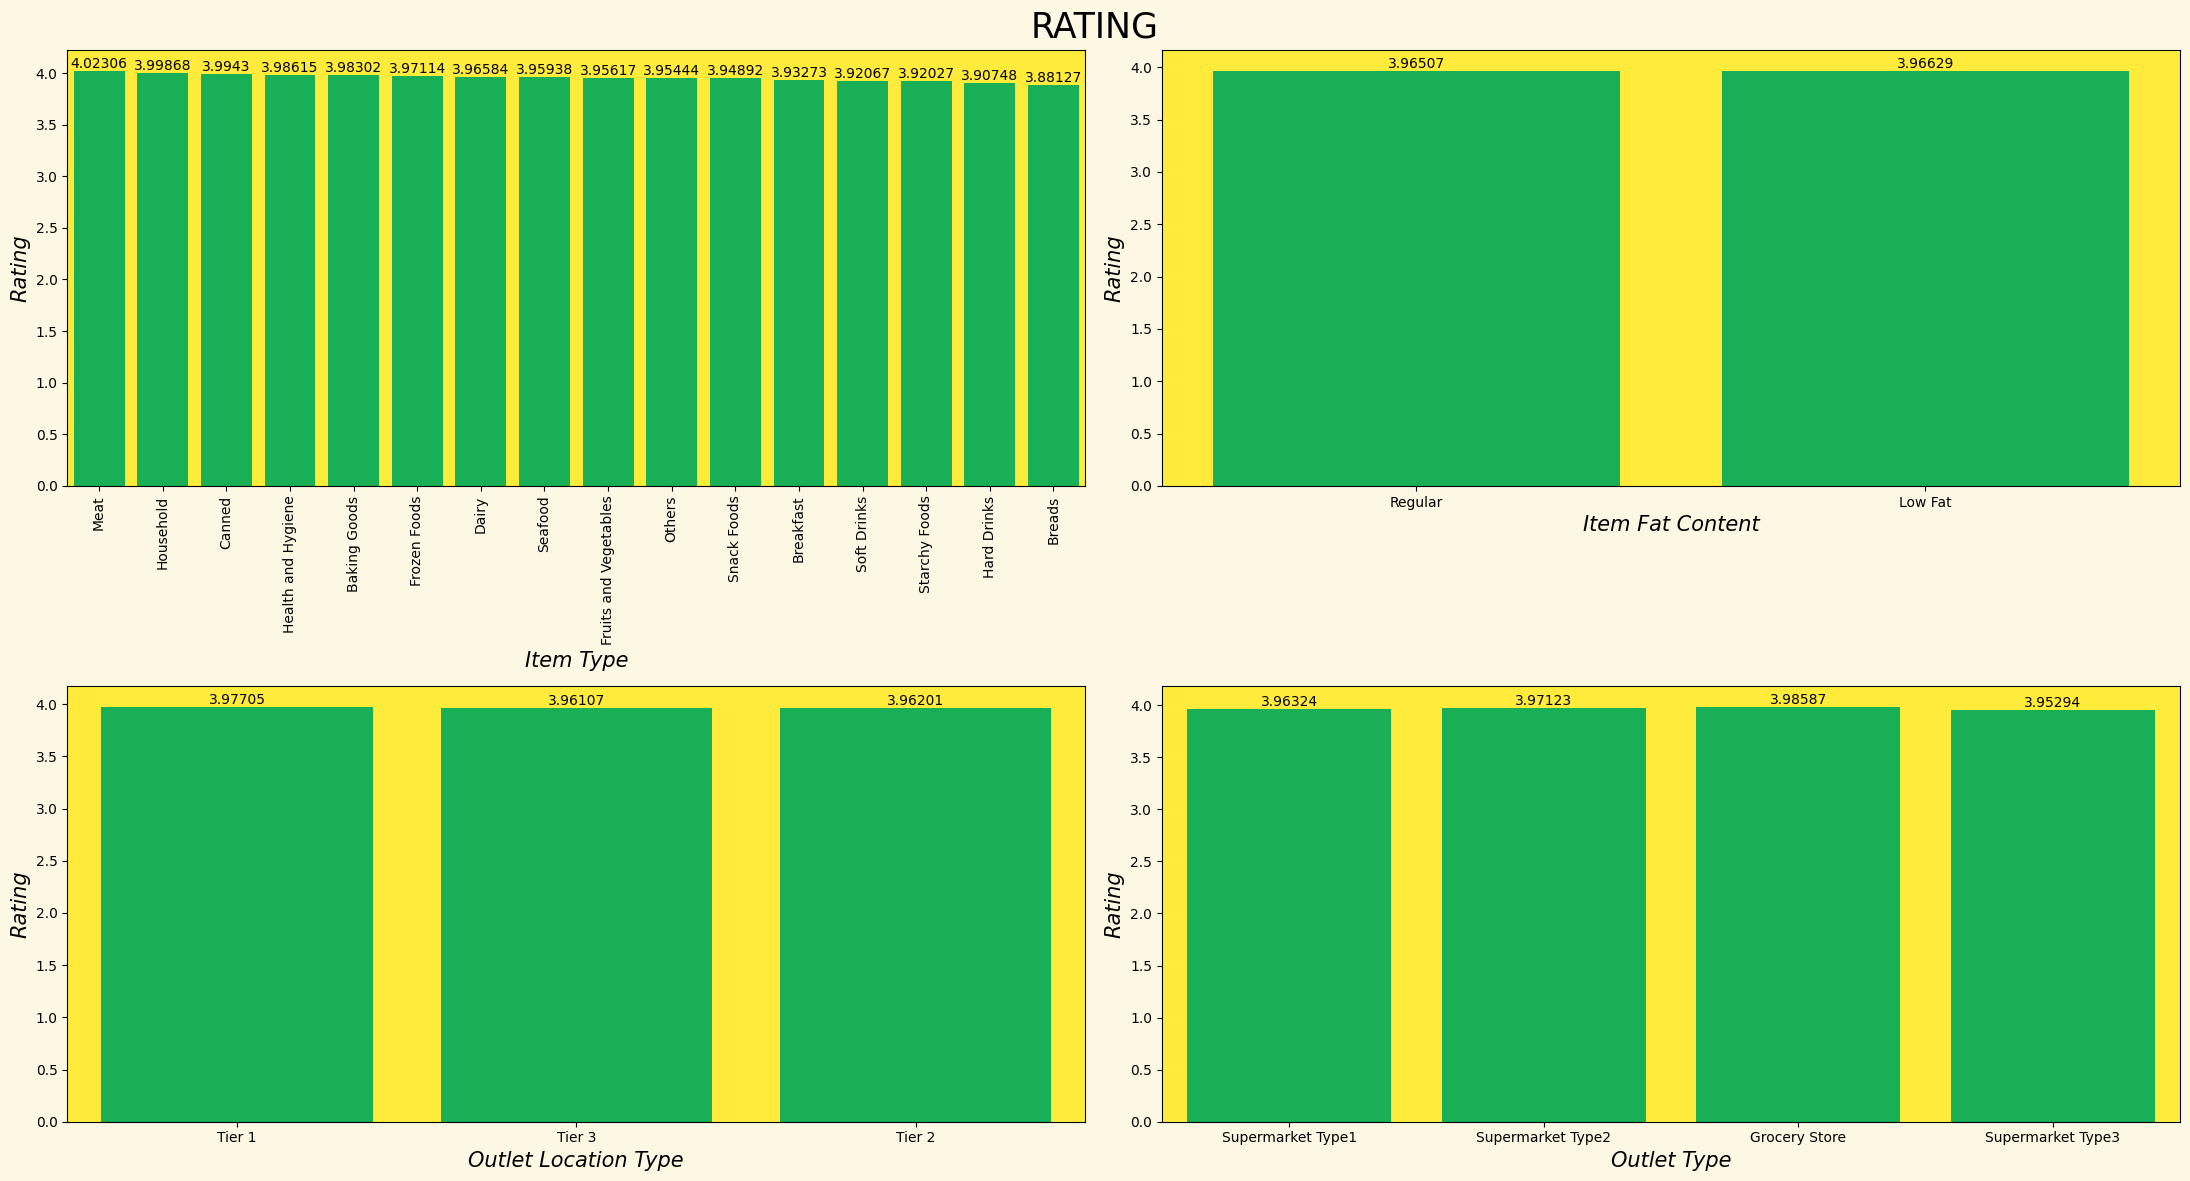

In [12]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(22,12))
fig.set_facecolor('#fdf8e3')
fig.suptitle('RATING',fontsize=25)
#Avg Rating by Item Type
a=df.groupby('Item Type')['Rating'].mean().sort_values(ascending=False)
a=pd.DataFrame(a)
b=sns.barplot(x='Item Type',y='Rating',data=a,color=green,errorbar=None,ax=axes[0,0])
axes[0][0].set_facecolor(yellow)
axes[0][0].set_xlabel('Item Type',fontsize=15,fontstyle='italic')
axes[0][0].set_ylabel('Rating',fontsize=15,fontstyle='italic')
data_label(b)
axes[0][0].set_xticklabels(a.index,rotation=90)


#Avg Rating by Item Fat content
a=sns.barplot(x='Item Fat Content',y='Rating',data=df,color=green,errorbar=None,ax=axes[0,1])
axes[0][1].set_facecolor(yellow)
axes[0][1].set_xlabel('Item Fat Content',fontsize=15,fontstyle='italic')
axes[0][1].set_ylabel('Rating',fontsize=15,fontstyle='italic')
data_label(a)


#Avg Rating by Outlet Location Type
a=sns.barplot(x='Outlet Location Type',y='Rating',data=df,color=green,errorbar=None,ax=axes[1,0])
axes[1][0].set_facecolor(yellow)
axes[1][0].set_xlabel('Outlet Location Type',fontsize=15,fontstyle='italic')
axes[1][0].set_ylabel('Rating',fontsize=15,fontstyle='italic')
data_label(a)


#Avg Rating by Outlet Type
a=sns.barplot(x='Outlet Type',y='Rating',data=df,color=green,errorbar=None,ax=axes[1,1])
axes[1][1].set_facecolor(yellow)
axes[1][1].set_xlabel('Outlet Type',fontsize=15,fontstyle='italic')
axes[1][1].set_ylabel('Rating',fontsize=15,fontstyle='italic')
data_label(a)

plt.tight_layout()

Average Rating for all categories is almost same  

# Conclusion:

#1. Sales are High in Fruits and Vegetables & Snack Food Item Type.
#2. Got highest Sales In the year 2018 compared to other years
#3. In Tier 3 outlet location Type Sales are high.
#4. Sales are very high in Supermarket Type 1 compared to others.
#5. Rating is same i.e, almost 4 in all columns.